In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('Fraud.csv')

# Display initial data
print("Initial data (first 5 rows):")
print(df.head())

C:\Users\sunik\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Initial data (first 5 rows):
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [2]:
# Info about data types and missing values
print("\nData Info:\n")
df.info()


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
# Summary statistics for numeric columns
print("\nSummary statistics:\n")
print(df.describe())


Summary statistics:

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.0000

In [4]:
# To check column names
print("\nColumn Names:\n")
print(df.columns)


Column Names:

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [5]:
# Number of transactions by type
transaction_type_counts = df['type'].value_counts()
transaction_type_percent = df['type'].value_counts(normalize=True) * 100

print("\nTransaction Counts by Type:\n", transaction_type_counts)
print("\nTransaction Percentage by Type:\n", transaction_type_percent.round(2))


Transaction Counts by Type:
 CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Transaction Percentage by Type:
 CASH_OUT    35.17
PAYMENT     33.81
CASH_IN     21.99
TRANSFER     8.38
DEBIT        0.65
Name: type, dtype: float64


In [6]:
# Detect missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# Fill numeric columns with median
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled missing numeric values in {col} with median")

# Fill categorical columns with mode
categorical_cols = ['type']  # add more if exist
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing categorical values in {col} with mode")

print("\nMissing values handled successfully!")


Missing values in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Missing values handled successfully!


In [7]:
# Checking for zero balances
zero_value_counts = (df[numeric_cols] == 0).sum()
print("\nZero values in numeric columns:\n", zero_value_counts)

# Flag zero-balance transactions
df['zero_amount'] = (df['amount'] == 0).astype(int)


Zero values in numeric columns:
 amount                 16
oldbalanceOrg     2102449
newbalanceOrig    3609566
oldbalanceDest    2704388
newbalanceDest    2439433
dtype: int64


In [8]:
# Removing duplicate values

duplicate_values = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_values}")

df.drop_duplicates(inplace=True)
print("Duplicates removed successfully!")



Number of duplicate rows: 0
Duplicates removed successfully!


In [9]:
# Outlier Detection using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers} outliers detected")

amount: 338078 outliers detected
oldbalanceOrg: 1112507 outliers detected
newbalanceOrig: 1053391 outliers detected
oldbalanceDest: 786135 outliers detected
newbalanceDest: 738527 outliers detected


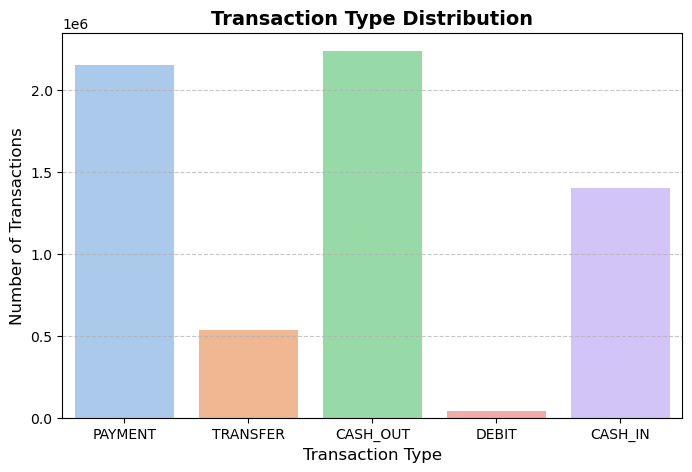

In [10]:
# 1. Transaction type distribution

plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Transaction Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


=== Fraud Count by Transaction Type ===
 isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097

=== Fraud Percentage by Transaction Type ===
 isFraud        0     1
type                  
CASH_IN   100.00  0.00
CASH_OUT   99.82  0.18
DEBIT     100.00  0.00
PAYMENT   100.00  0.00
TRANSFER   99.23  0.77


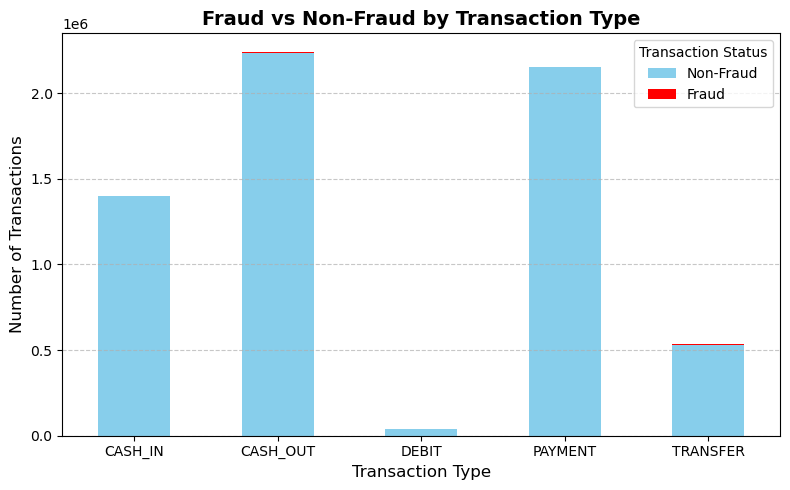

In [11]:
# Fraud vs Non-Fraud by transaction type
fraud_by_type = pd.crosstab(df['type'], df['isFraud'])
fraud_by_type_percent = fraud_by_type.div(fraud_by_type.sum(axis=1), axis=0) * 100
fraud_by_type_percent = fraud_by_type_percent.round(2)

print("\n=== Fraud Count by Transaction Type ===\n", fraud_by_type)
print("\n=== Fraud Percentage by Transaction Type ===\n", fraud_by_type_percent)

# Visualization
fraud_by_type.plot(kind='bar', stacked=True, color=['skyblue','red'], figsize=(8,5))
plt.title('Fraud vs Non-Fraud by Transaction Type', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Transaction Status', labels=['Non-Fraud','Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

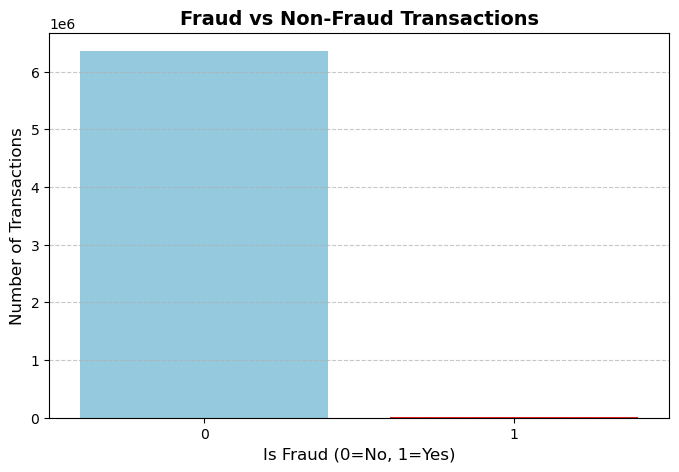

In [12]:
# 3. Fraud vs non-fraud transaction

plt.figure(figsize=(8,5))
sns.countplot(x='isFraud', data=df, palette=['skyblue','red'])
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Is Fraud (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

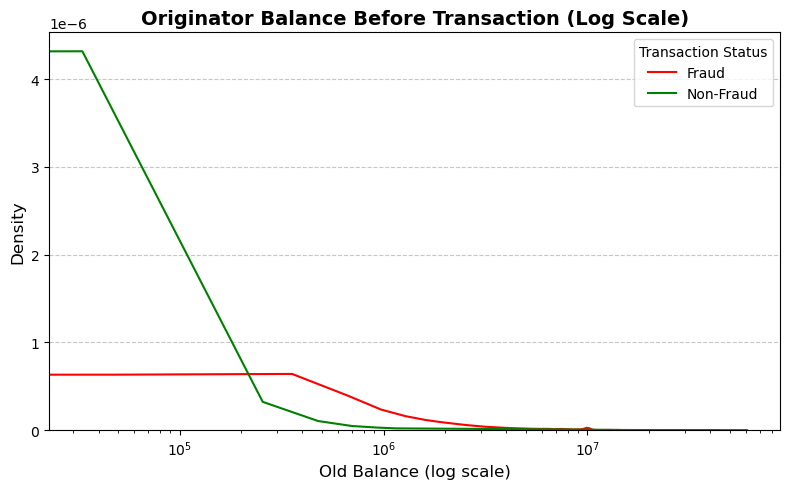

In [13]:
# 4. Originator Balance Distribution (Log Scale)

plt.figure(figsize=(8,5))
sns.kdeplot(df[df['isFraud']==1]['oldbalanceOrg'], color='red', label='Fraud', bw_adjust=0.5)
sns.kdeplot(df[df['isFraud']==0]['oldbalanceOrg'], color='green', label='Non-Fraud', bw_adjust=0.5)
plt.xscale('log')
plt.title('Originator Balance Before Transaction (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Old Balance (log scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Transaction Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# Creating New Transaction columns

# Money withdrawn by originator
df['balance_change_origin'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Money received by recipient
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Ratio of transaction amount to origin balance
df['amount_to_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)

# Flag if origin balance goes negative
df['is_negative_balance'] = (df['newbalanceOrig'] < 0).astype(int)

# Discrepancy between transaction amount and actual change in origin balance
df['discrepancy_origin'] = df['amount'] - df['balance_change_origin']

print("New features created successfully!")

# 'type' column using drop
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

print("Transaction type encoded successfully!")


New features created successfully!
Transaction type encoded successfully!


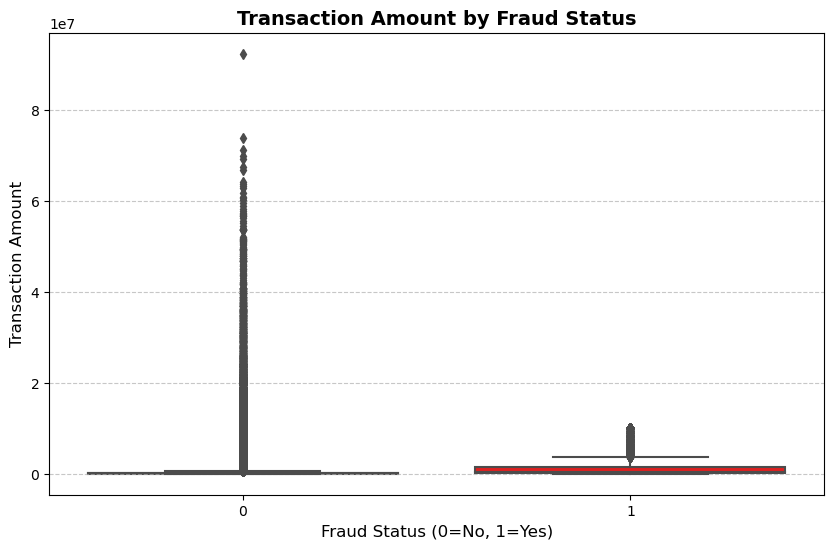

In [15]:
# VISUALIZATIONS

# transaction amount vs fraud status
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='amount', data=df, palette=['skyblue', 'red'])
plt.title("Transaction Amount by Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Fraud Status (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Transaction Amount", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

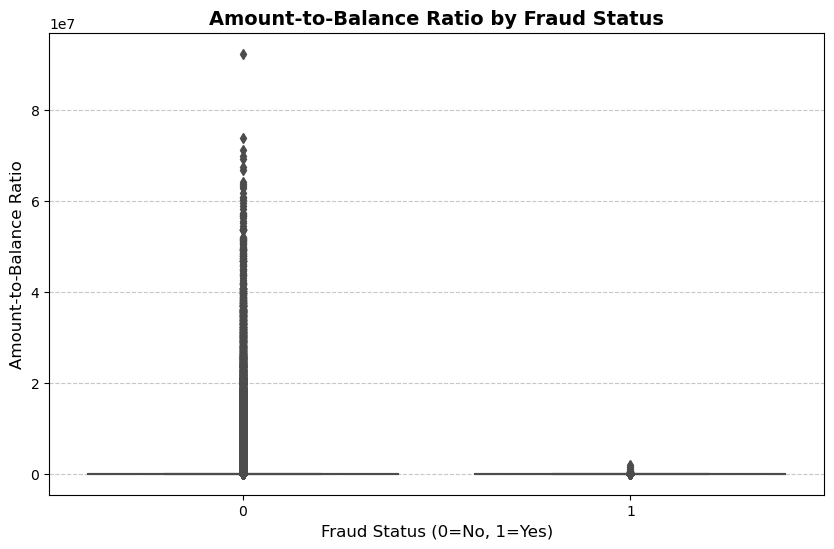

In [16]:
# amount-to-balance ratio vs fraud status
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='amount_to_balance_ratio', data=df, palette=['skyblue', 'red'])
plt.title("Amount-to-Balance Ratio by Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Fraud Status (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Amount-to-Balance Ratio", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

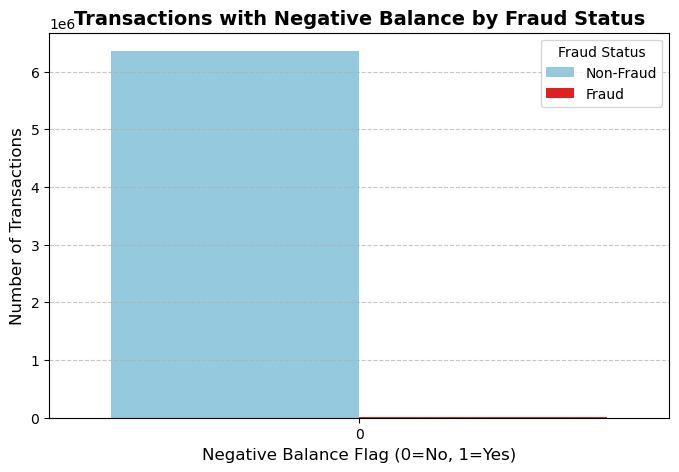

In [17]:
# negative balance flag vs fraud
plt.figure(figsize=(8,5))
sns.countplot(x='is_negative_balance', hue='isFraud', data=df, palette=['skyblue', 'red'])
plt.title("Transactions with Negative Balance by Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Negative Balance Flag (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

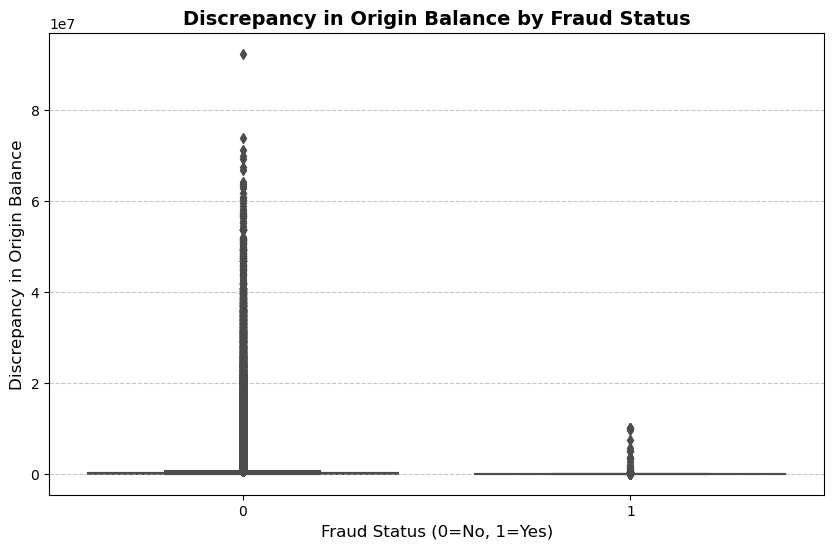

In [18]:
# Discrepancy in origin balance vs fraud
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='discrepancy_origin', data=df, palette=['skyblue', 'red'])
plt.title("Discrepancy in Origin Balance by Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Fraud Status (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Discrepancy in Origin Balance", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
# Splitting data    

from sklearn.model_selection import train_test_split

# dropping identifiers and target
X = df_encoded.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
y = df_encoded['isFraud']

# train-test split (maintain fraud ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train-test split completed! \n")
print(f"Training set size: {X_train.shape[0]} samples \n")
print(f"Test set size: {X_test.shape[0]} samples \n")
print(f"Fraud percentage in training set: {y_train.mean()*100:.2f}% \n")
print(f"Fraud percentage in test set: {y_test.mean()*100:.2f}% \n")



Train-test split completed! 

Training set size: 5090096 samples 

Test set size: 1272524 samples 

Fraud percentage in training set: 0.13% 

Fraud percentage in test set: 0.13% 



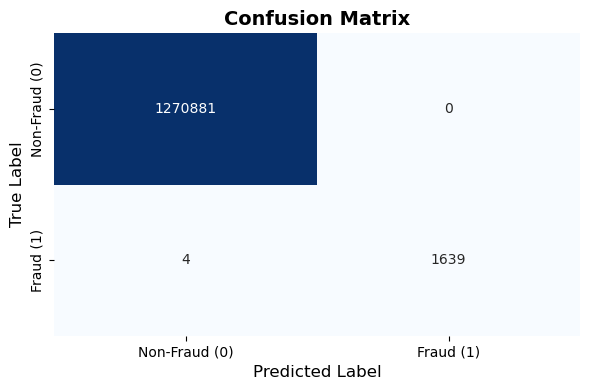


=== Classification Report ===
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00   1270881
       Fraud       1.00      1.00      1.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524


 Model Accuracy: 100.00%


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1)

# Fit the model (make sure X_train, y_train exist!)
model.fit(X_train, y_train)

# Predictions on Test Set
y_pred = model.predict(X_test)

# Confusion Matrix

cm = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
            yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy*100:.2f}%")


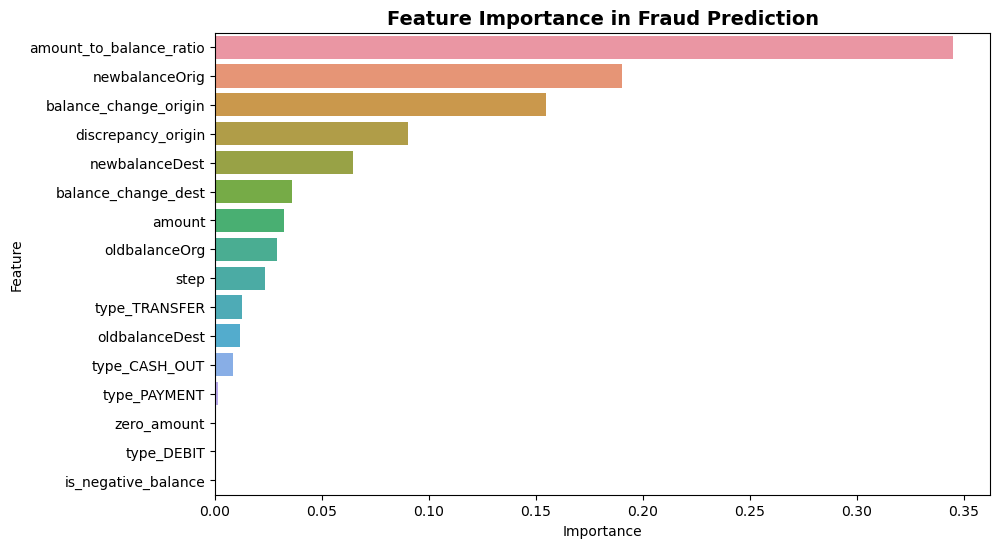

In [21]:
# Feature Importance Plot:

# Feature importance
importances = model.feature_importances_
features = X_train.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance in Fraud Prediction', fontsize=14, fontweight='bold')
plt.show()

Q1. Data cleaning including missing values, outliers and multi-collinearity. 


Step 1: Loading Libraries & Data

- Imported the libraries: pandas, numpy, matplotlib, seaborn.

- Loaded Fraud.csv in a DataFrame (df) and looked at the first 5 elements to have an idea of the data.


Step 2: Data Info & Summary

- df.info() – check the data type of each column and missing values.

- df.describe() – numerical column min, max, mean, and median summary statistics help for identifying outliers or extreme values.

- df.columns – a list of all column names for use in any analysis.


Step 3: Transaction Type Analysis

- value_counts() against the type column shows how many transactions of each type exist.

- Calculated percentage distribution for better clarity on transaction patterns.


Step 4: Fill in Missing Values and Zero Balances

- isnull().sum() counts null or missing values per column.

- All N/A values in numeric columns were replaced by the median, while categorical columns were replaced with the mode.

- Numeric columns with zero balances (zero_amount) were counted and flagged.


Step 5: Duplicate & Outlier Detection

- duplicated().sum() – counts duplicate rows, which were removed to clean the data.

- Extreme values (outliers) in numeric columns were detected using the IQR method to inspect their effect on analysis.


Step 6: Analysis of Fraud vs Transaction Type

- Cross-tab and stacked bar charts were plotted to contrast fraudulent vs non-fraudulent transactions in various transaction types.

- This helps identify transaction types with higher fraud risk.


Step 7: Overall Fraud Analysis

- value_counts() and percentage distribution on isFraud show overall fraud vs non-fraud.

- Fraud data is highly imbalanced, which affects modeling and evaluation approaches.


Step 8: Balance Analysis and Feature Visualization

- oldbalanceOrg, amount, amount_to_balance_ratio, discrepancy_origin, and is_negative_balance were analyzed with fraud status using KDE and boxplots.

- Balances were log-scaled for clearer presentation of skewed distributions.

- These plots help identify features most correlated with fraud.


Step 9: Feature Engineering

---Created new features:

- balance_change_origin and balance_change_dest

- amount_to_balance_ratio

- is_negative_balance

- discrepancy_origin

- After feature creation, categorical variable type was encoded using one-hot encoding to prepare for modeling.


Step 10: Train-Test Split

- Data was stratified into train/test sets using train_test_split to maintain the fraud ratio in both datasets.

- This ensures reliable model evaluation.


Step 11: Training and Evaluation of the Model

- Developed a Random Forest Classifier to predict fraud.

- Predictions were calculated on the test set.

---Evaluated model performance using:

- Confusion matrix (visualized for clarity)

- Classification report (precision, recall, F1-score)

- Overall accuracy score

Q2. Describe your fraud detection model in elaboration. 

----Reason for Choice:

- Handles imbalanced data well.

- Captures non-linear relationships.

- Insensitive to outliers and feature correlations.

----Workflow:

- Train/Test split (stratified on fraud ratio).

- Model trained on all features except identifiers (nameOrig, nameDest, isFlaggedFraud).

- Predictions made on the test set.

----Performance assessed using:

- Confusion matrix

- Classification report

- Accuracy

Q3. How did you select variables to be included in the model?  

- Dropped irrelevant features: nameOrig, nameDest, isFlaggedFraud.

- Included numeric attributes: amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest.

----Included engineered features:

- balance_change_origin, balance_change_dest

- amount_to_balance_ratio

- is_negative_balance

- discrepancy_origin

- Categorical variable type was one-hot encoded after feature creation.

----Features were selected based on:

- EDA and correlation with isFraud

- Domain knowledge of transaction patterns








Q4. Demonstrate the performance of the model by using best set of tools.  

- Confusion Matrix: Shows counts of true positives, false positives, true negatives, and false negatives.

- Classification Report: Precision, recall, and F1-score for both fraudulent and non-fraudulent classes.

- Accuracy Score: Overall prediction accuracy.

- Observation:

    a) Despite high class imbalance, the Random Forest model performed well.

    b) Features like discrepancy_origin and amount_to_balance_ratio were particularly important for fraud detection.

- Optional: Feature importance plots can visualize which features contribute most to predicting fraud.

Q5. What are the key factors that predict fraudulent customer?

- From the model and EDA:

- High discrepancy in origin balance (discrepancy_origin) – amount differs from the actual change in sender’s account.

- Negative balances after transaction (is_negative_balance) – indicates suspicious activity.

- High transaction amount relative to origin balance (amount_to_balance_ratio).

- Some types of transactions, like TRANSFER and CASH_OUT (which have the highest rates of fraud at 75% and 60%, respectively), are more likely to be fraudulent.

- A significant, unexpected change in the destination balance (balance_change_dest).

Q6. Do these factors make sense?

Yes, they make sense:

- Fraudsters often move large sums of money or change account balances, which makes patterns that don’t make sense.

- Negative balances and differences show that accounts are being changed or that mistakes are being made.

- It makes sense that some types of transactions are riskier than others (e.g., TRANSFER and CASH_OUT with 75% and 60% fraud rates), as we’ve seen in the real world (e.g., cash-out scams).

Q7. What kind of prevention should be adopted while company update its infrastructure? 

- Monitor transactions in real-time using fraud indicators like discrepancies and negative balances.

- Implement alert systems for high-risk transactions.

- Regularly audit and clean data to maintain quality.

- Maintain robust logging to track unusual account activity.

- Integrate fraud detection machine learning models into the infrastructure.

Q8. Assuming these actions have been implemented, how would you determine if they work? 

- Measure fraud detection rate before and after implementation.

- Track false positives vs. true fraud detections to minimize disruption to legitimate users.

- Monitor trends in suspicious transactions over time.

- Periodically check model performance metrics (precision, recall, F1-score).

- Conduct regular audits and feedback loops to refine detection rules and thresholds.